## Importing Libraries

In [22]:
import requests
import zipfile
from pathlib import Path
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path
import requests, zipfile, os

folder = Path('resources')
image_path = folder / 'data'

if image_path.is_dir():
    print(f"{image_path} already exists")
else:
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download the file
    url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip"
    response = requests.get(url)

    zip_file_path = image_path / 'concrete_crack_images_for_classification.zip'
    with open(zip_file_path, 'wb') as f:
        print("Downloading the file")
        f.write(response.content)

    # Confirm download
    print(f"Downloaded size: {zip_file_path.stat().st_size / 1024:.2f} KB")

    # Unzip it
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        print("Unzipping the file")
        zip_ref.extractall(image_path)

    os.remove(zip_file_path)


resources/data already exists


In [3]:
for dir_paths, dir_files, file_names in os.walk(image_path):
    print(f" There are {len(dir_files)} directories and {len(file_names)} images in {dir_paths}")

 There are 2 directories and 0 images in resources/data
 There are 0 directories and 20000 images in resources/data/Positive
 There are 0 directories and 20000 images in resources/data/Negative


Positive folder contains images which doesn't have any kinds of cracks and negative has the vice versa files. 

In [5]:
crack_positive_path = image_path/'positive'
crack_negative_path = image_path/'negative'

In [8]:
crack_negative_path,crack_positive_path

(PosixPath('resources/data/negative'), PosixPath('resources/data/positive'))

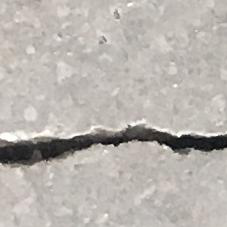

In [36]:
# Plot some random images from positive folders
import random
positive_image_list = list(Path(crack_positive_path).glob('*.jpg'))

rand_postive_img = random.choice(positive_image_list)

img = Image.open(rand_postive_img)

Path(rand_postive_img).parent.stem
img

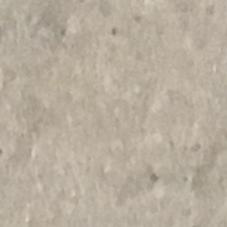

In [53]:
# Plot some random image from negative folders

negative_image_list = list(Path(crack_negative_path).glob('*.jpg'))

rand_negative_img = random.choice(negative_image_list)

img = Image.open(rand_negative_img)

img


<Figure size 3000x1500 with 0 Axes>

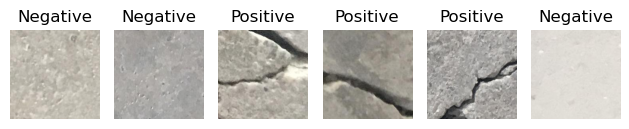

In [60]:
# Plot images with matplotlib
import numpy as np
image_list = list(Path(image_path).glob('*/*.jpg'))

rand_imgs = random.sample(image_list,k = 6)

plt.figure(figsize = (30,15))
plt.subplots(nrows = 1, ncols = 6)
for idx,img in enumerate(rand_imgs):
    
    # set the subplot
    plt.subplot(1,6,idx+1)
    # convert the image into numpy
    np_img = np.asarray(Image.open(img))
    plt.imshow(np_img)
    plt.title(f"{Path(img).parent.stem}")
    plt.axis(False)
    plt.tight_layout()
    
    